## 13-1 들어가며

## 13-4 포켓몬 데이터 불러오기

### 라이브러리 가져오기
___


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


- numpy 와 pandas는 1차원 또는 2차원 형식의 표 데이터를 다루기 최적화된 라이브러리
- seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화할 때 쓰임, seaborn은 matplotlib 의 상위 버전, matplotlib 이 조금 더 단순하지만 seaborn은 고급화된 그래프 그릴 수 있음
   
   
   ### 데이터셋을 pandas로 불러오기

In [6]:
import os
csv_path = os.getenv("HOME")+"/workplace/sba_project/aiffel/data/pokemon_eda/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [7]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [10]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon['Legendary']==False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 13-5 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체칼럼

빈 데이터 확인하기 
___
결측치 확인하기

In [11]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### 전체 컬럼 이해하기
___

In [12]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 13-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름

### #:ID number
___
총 몇 종류의 # 값이 있는지 확인

In [14]:
len(set(pokemon["#"]))

721

In [18]:
pokemon[pokemon["#"] ==3]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


### name: 이름
___

In [19]:
len(set(pokemon["Name"]))

800

## 13-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성

type1 & type2 : 포켓몬의 속성
___

In [23]:
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [25]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [27]:
set(pokemon["Type 1"]) - set(pokemon["Type 2"])

set()

In [29]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Steel', 'Fairy', 'Dark', 'Grass', 'Psychic', 'Fire', 'Water', 'Ground', 'Dragon', 'Bug', 'Electric', 'Flying', 'Poison', 'Ghost', 'Ice', 'Rock', 'Fighting']


In [30]:
pokemon["Type 2"].isna().sum()

386

### type1 데이텉 분포 plot
___

Text(0.5, 1.0, '[Legendary Pokemons]')

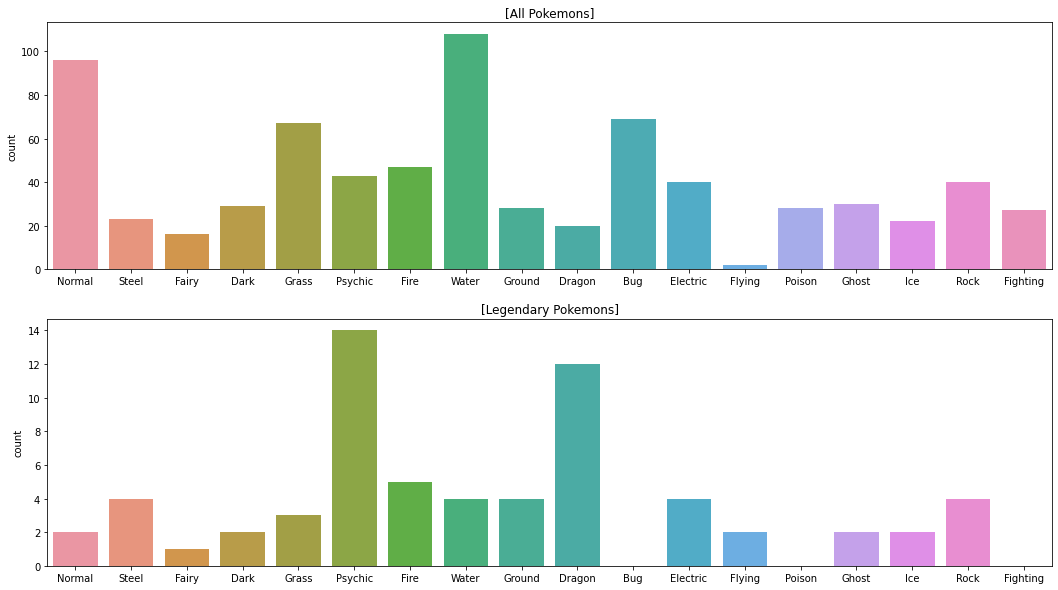

In [35]:
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data=ordinary, x = "Type 1", order =types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")